In [10]:
import os
import numpy as np
from PIL import Image
import cv2

In [53]:
dir = 'd:\\Java\\Datasets\\Jano\\kvety\\training'
#dir = 'd:\\Java\\Datasets\\flowers'

#test_image = Image.open(dir + 'test\\tulipan1.jpg')
#test_image.show()

In [54]:
#test_image.thumbnail((90,120))
#test_image.show()

In [55]:
#test_image_array = np.asarray(test_image)
#image_array
#np.shape(test_image_array)

In [56]:
categories=['dandelion', 'daisy', 'sunflower', 'tulip', 'rose']
features=[]
for i in categories:
    path=os.path.join(dir,i)
    num_classes=categories.index(i)
    for img in os.listdir(path):
        if img.endswith('.jpg'):
            
            img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_COLOR)
            img_array=cv2.resize(img_array,(150,150))
            features.append([img_array,num_classes])
X=[]
y=[]
for i,j in features:
    X.append(i)
    y.append(j)

In [57]:
X=np.array(X).reshape(-1,150,150,3)/255.0

#features
#np.savez('train.npz', images=X, labels=y)
#data_train = np.load('train.npz')
#data_test = np.load('test.npz')

In [58]:
images_train = data_train['images']
labels_train = data_train['labels']

In [59]:
import tensorflow as tf
#from tensorflow.keras.utils import to_categorical
#y=to_categorical(y)
labels_train = tf.keras.utils.to_categorical(labels_train)

In [60]:
from sklearn.model_selection import train_test_split
train_data,validation_data,train_labels,validation_labels=train_test_split(images_train,labels_train,test_size=0.2,random_state=12)


In [61]:
from keras import backend as K
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from keras.layers import Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [62]:
model = Sequential()

model.add(Conv2D(32, (5, 5), input_shape=(150,150,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

model.add(Conv2D(64, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(2, 2))

model.add(Flatten())
#model.add(Dense(5, activation="softmax"))
model.add(Dense(5))

In [63]:
epochs=10

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [64]:
model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 146, 146, 32)      2432      
_________________________________________________________________
activation_7 (Activation)    (None, 146, 146, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 71, 71, 64)        18496     
_________________________________________________________________
activation_8 (Activation)    (None, 71, 71, 64)        0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 78400)            

In [65]:
datagen = ImageDataGenerator(
       # featurewise_center=False,  # set input mean to 0 over the dataset
       # samplewise_center=False,  # set each sample mean to 0
       # featurewise_std_normalization=False,  # divide inputs by std of the dataset
       # samplewise_std_normalization=False,  # divide each input by its std
       # zca_whitening=False,  # apply ZCA whitening
       # rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
       # zoom_range = 0.1, # Randomly zoom image 
       # width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
       # height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
       # horizontal_flip=True,  # randomly flip images
       # vertical_flip=False  # randomly flip images
)


datagen.fit(train_data)

In [66]:
History = model.fit_generator(datagen.flow(train_data,train_labels, batch_size=128),
                              epochs = 5, validation_data = (validation_data,validation_labels),
                              verbose = 1)

Epoch 1/5
28/28 [==============================] - 80s 3s/step - loss: 6.7807 - accuracy: 0.2192 - val_loss: 7.0808 - val_accuracy: 0.2324
Epoch 2/5
 8/28 [=======>......................] - ETA: 53s - loss: 6.5008 - accuracy: 0.1924

KeyboardInterrupt: 

In [7]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt
import numpy as np

def process_image(url):
    #response=requests.get(url)
    img=Image.open(url)
                    
    fix,ax=plt.subplots(1,3,figsize=(15,20))
    ax[0].imshow(img)
    ax[0].set_title('image')
    
    #grayscale and normalization
    img=np.array(img)
    img=cv2.cvtColor(img,cv2.IMREAD_COLOR)
    print(img.shape)
    img=img/255.0
    ax[1].imshow(img)
    ax[1].set_title('color image')
    
    #resizing
    img=cv2.resize(img,(150,150))
    print(img.shape)
    ax[2].imshow(img)
    ax[2].set_title('predicted image')
    plt.tight_layout()
    img=np.expand_dims(img,axis=0)
    #making it model ready
    
    print(img.shape)
    return img


In [8]:
def predict(url):
    img=process_image(url)
    label=model.predict(img)
    final_1=np.argmax(label,axis=1)[0]
    plt.xlabel(categories[final_1])
    return categories[final_1]

## Testing our models

(263, 320, 3)
(150, 150, 3)
(1, 150, 150, 3)


NameError: name 'model' is not defined

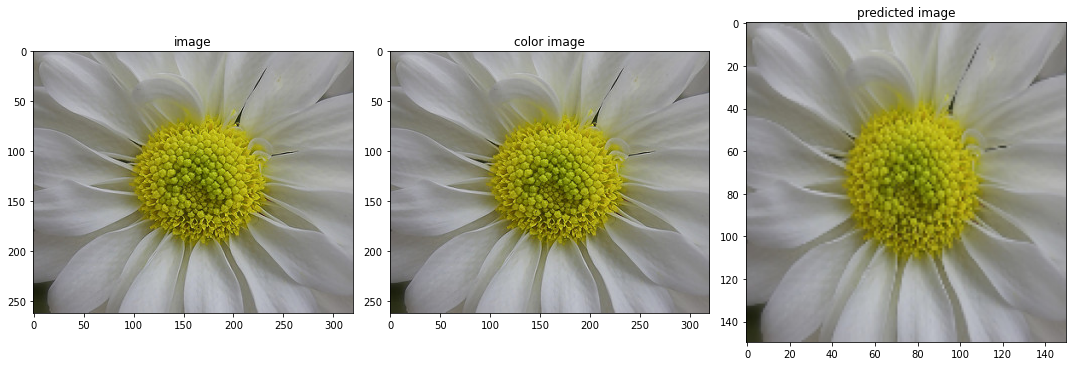

In [11]:
predict("d:\\Java\\Datasets\\Jano\\kvety\\testing\\daisy\\100080576_f52e8ee070_n.jpg") 